# Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from seaborn.utils import ci

# Data Cleaning and Exploratory Data Analysis

### Create Dataframes from csv files

In [2]:
dailyCovidCases = pd.read_csv("./data/case-data-by-day.csv")
dailyVaccinations = pd.read_csv("./data/vaccine-doses-by-day.csv")
dailyRidership = pd.read_csv("./data/MTA_Daily_Ridership_Data__Beginning_2020.csv")

### Exploratory Data Analysis

In [3]:
dailyCovidCases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   date_of_interest                 648 non-null    object
 1   CASE_COUNT                       648 non-null    int64 
 2   PROBABLE_CASE_COUNT              648 non-null    int64 
 3   HOSPITALIZED_COUNT               648 non-null    int64 
 4   DEATH_COUNT                      648 non-null    int64 
 5   CASE_COUNT_7DAY_AVG              648 non-null    int64 
 6   ALL_CASE_COUNT_7DAY_AVG          648 non-null    int64 
 7   HOSP_COUNT_7DAY_AVG              648 non-null    int64 
 8   DEATH_COUNT_7DAY_AVG             648 non-null    int64 
 9   BX_CASE_COUNT                    648 non-null    int64 
 10  BX_PROBABLE_CASE_COUNT           648 non-null    int64 
 11  BX_HOSPITALIZED_COUNT            648 non-null    int64 
 12  BX_DEATH_COUNT                   648

In [4]:
dailyVaccinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DATE                                  359 non-null    object 
 1   ADMIN_DOSE1_DAILY                     359 non-null    int64  
 2   ADMIN_DOSE1_CUMULATIVE                359 non-null    int64  
 3   ADMIN_DOSE2_DAILY                     359 non-null    int64  
 4   ADMIN_DOSE2_CUMULATIVE                359 non-null    int64  
 5   ADMIN_SINGLE_DAILY                    359 non-null    int64  
 6   ADMIN_SINGLE_CUMULATIVE               359 non-null    int64  
 7   ADMIN_ADDITIONAL1_DAILY               359 non-null    int64  
 8   ADMIN_ADDITIONAL1_CUMULATIVE          359 non-null    int64  
 9   ADMIN_ADDITIONAL2_DAILY               359 non-null    int64  
 10  ADMIN_ADDITIONAL2_CUMULATIVE          359 non-null    int64  
 11  ADMIN_ADDITIONAL_DA

In [5]:
dailyRidership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Date                                                     647 non-null    object 
 1   Subways: Total Estimated Ridership                       647 non-null    int64  
 2   Subways: % of Comparable Pre-Pandemic Day                647 non-null    float64
 3   Buses: Total Estimated Ridership                         647 non-null    int64  
 4   Buses: % of Comparable Pre-Pandemic Day                  647 non-null    float64
 5   LIRR: Total Estimated Ridership                          646 non-null    float64
 6   LIRR: % of Comparable Pre-Pandemic Day                   646 non-null    float64
 7   Metro-North: Total Estimated Ridership                   647 non-null    int64  
 8   Metro-North: % of Comparable P

In [6]:
dailyRidership["Date"].dtype

dtype('O')

### Setting datetime objects

In [7]:
dailyRidership["Date"] = pd.to_datetime(dailyRidership["Date"])
dailyVaccinations["Date"] = pd.to_datetime(dailyVaccinations["DATE"])
dailyCovidCases["Date"] = pd.to_datetime(dailyCovidCases["date_of_interest"])

### MTA ridership was sorted in most recent date first, change to match other DFs

In [8]:
dailyRidership.sort_values(by="Date",inplace=True,ascending=True)
dailyRidership.reset_index(drop=True, inplace=True)

# Data Visualizations

### Subway Ridership Visualizations 

#### Plotting Ridership over Time with "Subways: Total Estimated Ridership" raw counts

C:\Users\tanve\AppData\Local\Temp\ipykernel_12264\1749488586.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax3=sns.lineplot(x=dailyRidership["Date"].dt.strftime('%m-%d-%Y'),
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanve\AppData\Local\Temp\ipykernel_12264\1749488586.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha

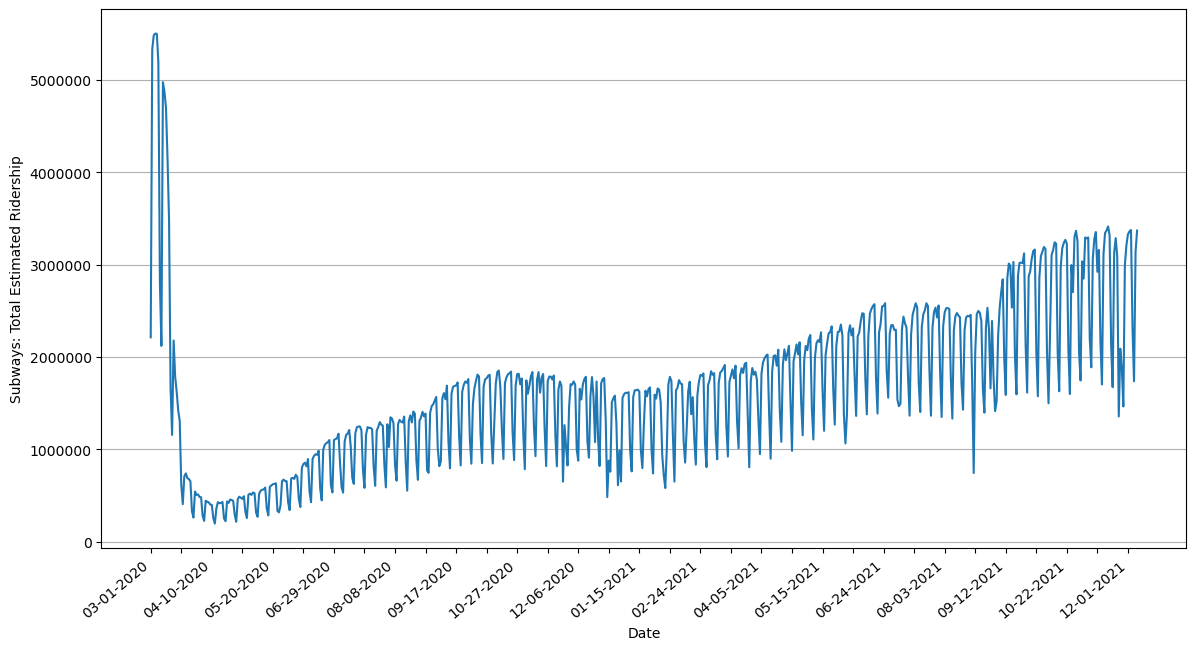

In [9]:
fig3, ax3 = plt.subplots(figsize=(14,7))
ax3=sns.lineplot(x=dailyRidership["Date"].dt.strftime('%m-%d-%Y'), 
                  y=dailyRidership["Subways: Total Estimated Ridership"], 
                  palette=["r"]
                  )
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax3.ticklabel_format(axis='y', style='plain')


for index, tickLabel in enumerate(ax3.get_xticklabels()):
    if index%40==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax3.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)
        
ax3.grid(True,axis='y')

#### Option 1: Remove weekend data to remove spikes

In [10]:
riders_df = dailyRidership[['Date','Subways: Total Estimated Ridership']]

In [11]:
riders_df_filtered = riders_df[~riders_df['Date'].dt.weekday.isin([5,6])]
riders_df_filtered.reset_index(drop=True, inplace=True)
riders_df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 2 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                462 non-null    datetime64[ns]
 1   Subways: Total Estimated Ridership  462 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.3 KB


C:\Users\tanve\AppData\Local\Temp\ipykernel_12264\4277778877.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax3=sns.lineplot(x=riders_df_filtered["Date"].dt.strftime('%m-%d-%Y'),
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanve\AppData\Local\Temp\ipykernel_12264\4277778877.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40

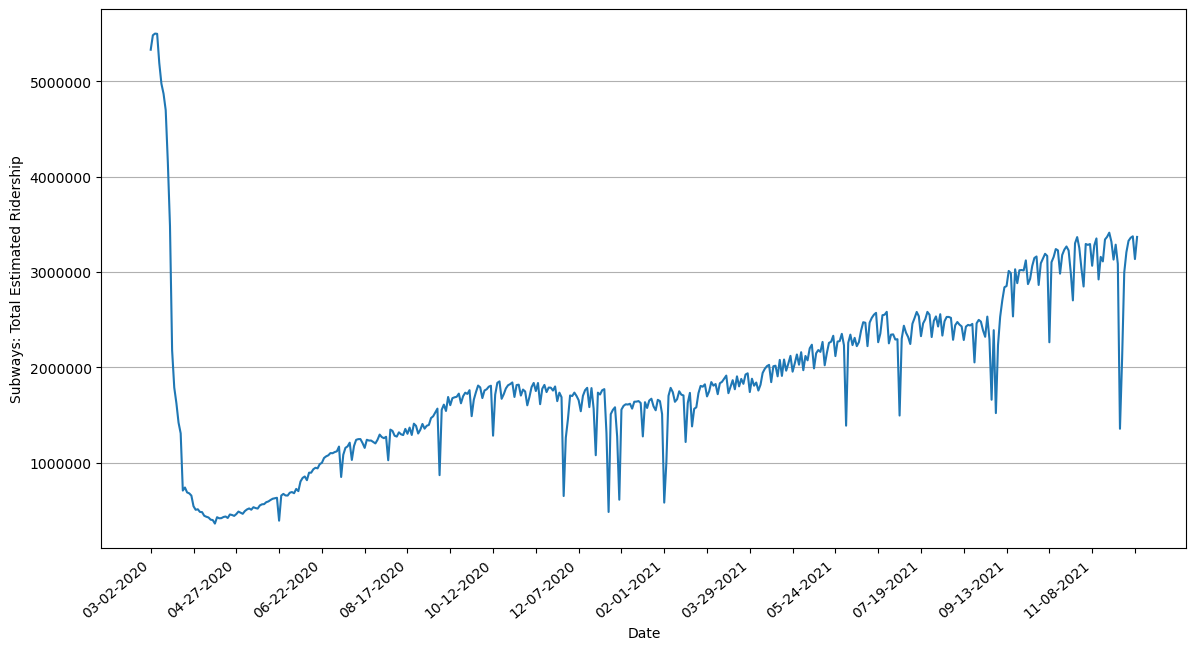

In [12]:
fig3, ax3 = plt.subplots(figsize=(14,7))
ax3=sns.lineplot(x=riders_df_filtered["Date"].dt.strftime('%m-%d-%Y'), 
                  y=riders_df_filtered["Subways: Total Estimated Ridership"], 
                  palette=["r"]
                  )
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax3.ticklabel_format(axis='y', style='plain')


for index, tickLabel in enumerate(ax3.get_xticklabels()):
    if index%40==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax3.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)
        
ax3.grid(True,axis='y')

#### Option 2: Use 7 day rolling average

In [13]:
riders_avg = riders_df.copy()

In [14]:
riders_avg.head()

,Date,Subways: Total Estimated Ridership
0,2020-03-01,2212965
1,2020-03-02,5329915
2,2020-03-03,5481103
3,2020-03-04,5498809
4,2020-03-05,5496453


In [15]:
riders_avg["7 day avg"] = riders_avg["Subways: Total Estimated Ridership"].rolling(window=7).mean()

c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanve\AppData\Local\Temp\ipykernel_12264\1779783051.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")


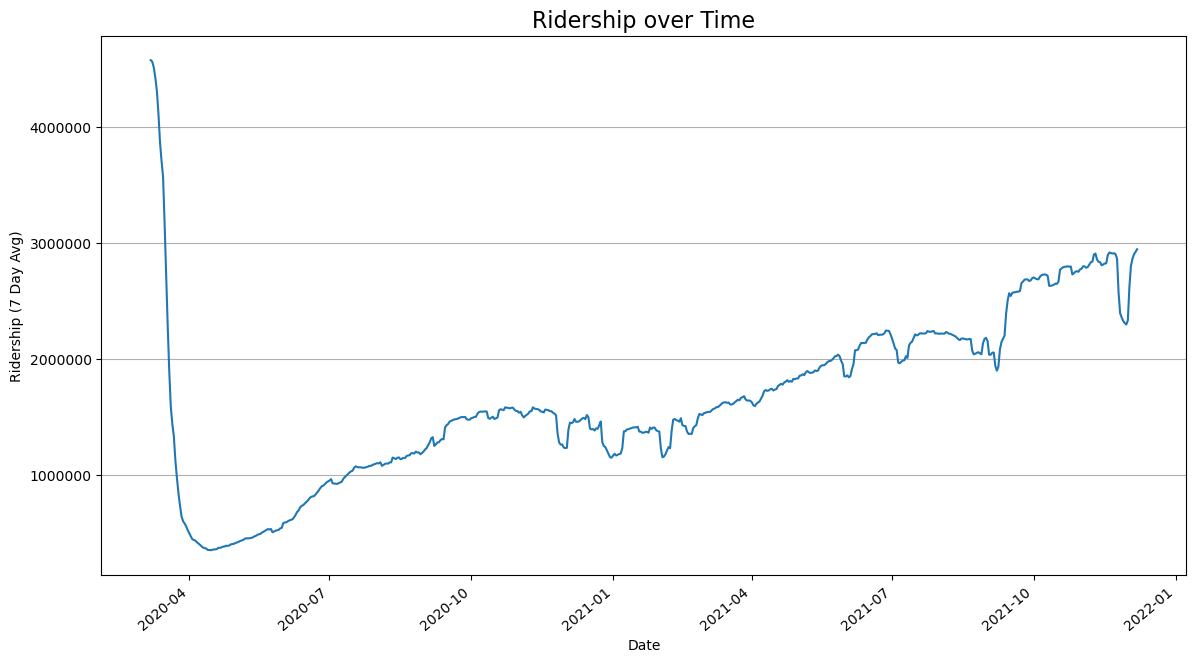

In [16]:
fig3, ax3 = plt.subplots(figsize=(14,7))
ax3=sns.lineplot(x=riders_avg["Date"], 
                  y=riders_avg["7 day avg"], 
                #   color='red'
                  )
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax3.ticklabel_format(axis='y', style='plain')
ax3.set_ylabel('Ridership (7 Day Avg)')
ax3.set_title('Ridership over Time', fontsize=16)

        
ax3.grid(True,axis='y')


### Covid-19 Case Count Visualizations

#### 7 day avg for cases

In [17]:
cases_df = dailyCovidCases[['Date', 'CASE_COUNT']]

cases_df['7 day avg'] = cases_df['CASE_COUNT'].rolling(window=7).mean()
cases_df.head(10)

C:\Users\tanve\AppData\Local\Temp\ipykernel_12264\1064388694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_df['7 day avg'] = cases_df['CASE_COUNT'].rolling(window=7).mean()


,Date,CASE_COUNT,7 day avg
0,2020-02-29,1,NaN
1,2020-03-01,0,NaN
2,2020-03-02,0,NaN
3,2020-03-03,1,NaN
4,2020-03-04,5,NaN
5,2020-03-05,3,NaN
6,2020-03-06,8,2.571429
7,2020-03-07,7,3.428571
8,2020-03-08,21,6.428571
9,2020-03-09,57,14.571429


c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanve\AppData\Local\Temp\ipykernel_12264\742783561.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")


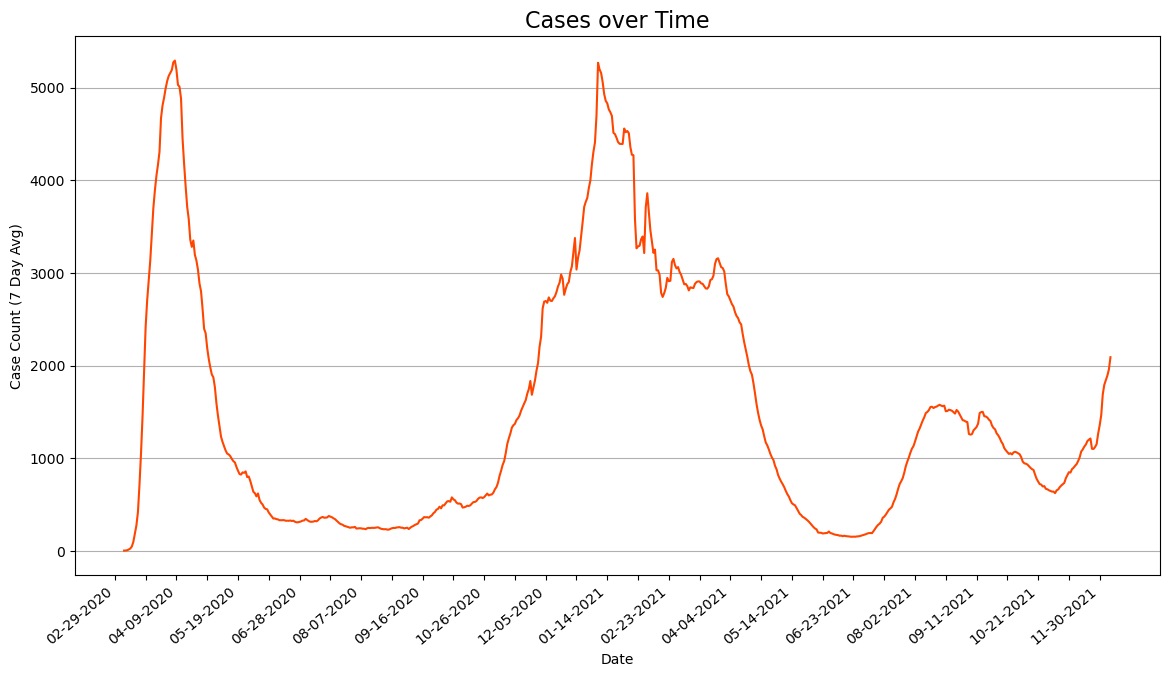

In [18]:
fig1, ax1 = plt.subplots(figsize=(14,7))
ax1 = sns.lineplot(x=cases_df["Date"].dt.strftime('%m-%d-%Y'), 
                  y=cases_df["7 day avg"], 
                  color='orangered',
                  )

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.ticklabel_format(axis='y', style='plain')
ax1.set_ylabel('Case Count (7 Day Avg)')
ax1.set_title('Cases over Time', fontsize=16)

for index, tickLabel in enumerate(ax1.get_xticklabels()):
    if index%40==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax1.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)

ax1.grid(True,axis='y')

### Plotting Ridership and Cases over Time

c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanve\AppData\Local\Temp\ipykernel_12264\2030297505.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

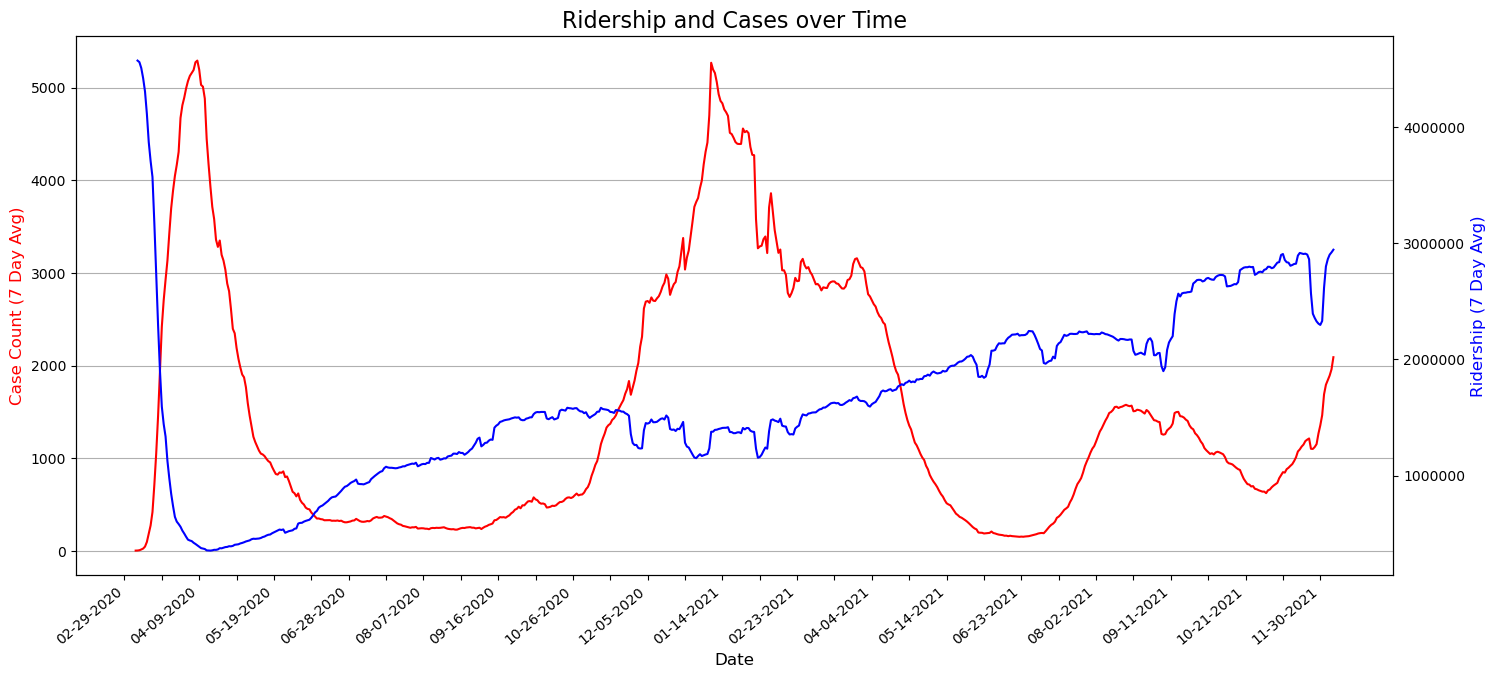

In [19]:
plt.figure(figsize=(17,7))
sns.lineplot(x=cases_df["Date"].dt.strftime('%m-%d-%Y'), 
                  y=cases_df["7 day avg"], 
                  color='red',
                  )
ax5 = plt.gca()
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")
ax5.ticklabel_format(axis='y', style='plain')
ax5.set_xlabel('Date', fontsize=12)
ax5.set_ylabel('Case Count (7 Day Avg)', fontsize=12, color="red")
ax5.set_title('Ridership and Cases over Time', fontsize=16)

for index, tickLabel in enumerate(ax5.get_xticklabels()):
    if index%40==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax5.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)

ax5.grid(True,axis='y')

ax6 = ax5.twinx()
sns.lineplot(x=riders_avg["Date"].dt.strftime('%m-%d-%Y'), y=riders_avg["7 day avg"], 
              ax=ax6, 
            #   join=True, 
            #   scale=0.3, 
              color='blue'
              )
ax6.ticklabel_format(axis='y', style='plain')
ax6.set_ylabel('Ridership (7 Day Avg)', fontsize=12, color="blue")

plt.show()

#### Graph if raw ridership and case count numbers were used

c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


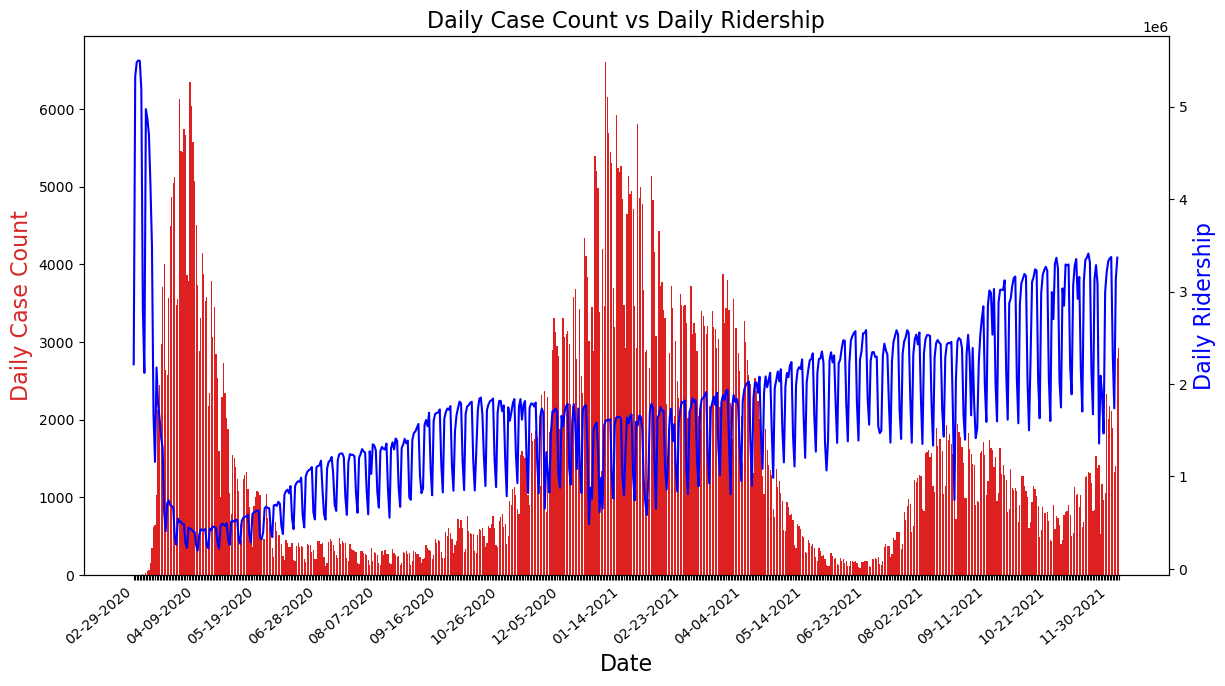

In [20]:
fig, ax1 = plt.subplots(figsize=(14,7))
ax1 = sns.barplot(x=dailyCovidCases["Date"].dt.strftime('%m-%d-%Y'), 
                  y=dailyCovidCases["CASE_COUNT"], 
                  palette=["r"]
                  )
ax1.set_title('Daily Case Count vs Daily Ridership', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Daily Case Count', fontsize=16, color="tab:red")


ax2 = ax1.twinx()
ax2 = sns.lineplot(x=dailyRidership["Date"].dt.strftime('%m-%d-%Y'),
                    y=dailyRidership["Subways: Total Estimated Ridership"], 
                    color="blue",
                    # join=True,
                    # scale=0.3
                    )
ax2.set_ylabel('Daily Ridership', fontsize=16, color="blue")

for index, tick in enumerate(ax1.get_xticklabels()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)
        
for index, tick in enumerate(ax3.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)
        
ax3.grid(True,axis='y')

### Vaccination Visualizations

C:\Users\tanve\AppData\Local\Temp\ipykernel_12264\1258735779.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax3=sns.lineplot(x=dailyVaccinations["Date"].dt.strftime('%m-%d-%Y'),
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanve\AppData\Local\Temp\ipykernel_12264\1258735779.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40,

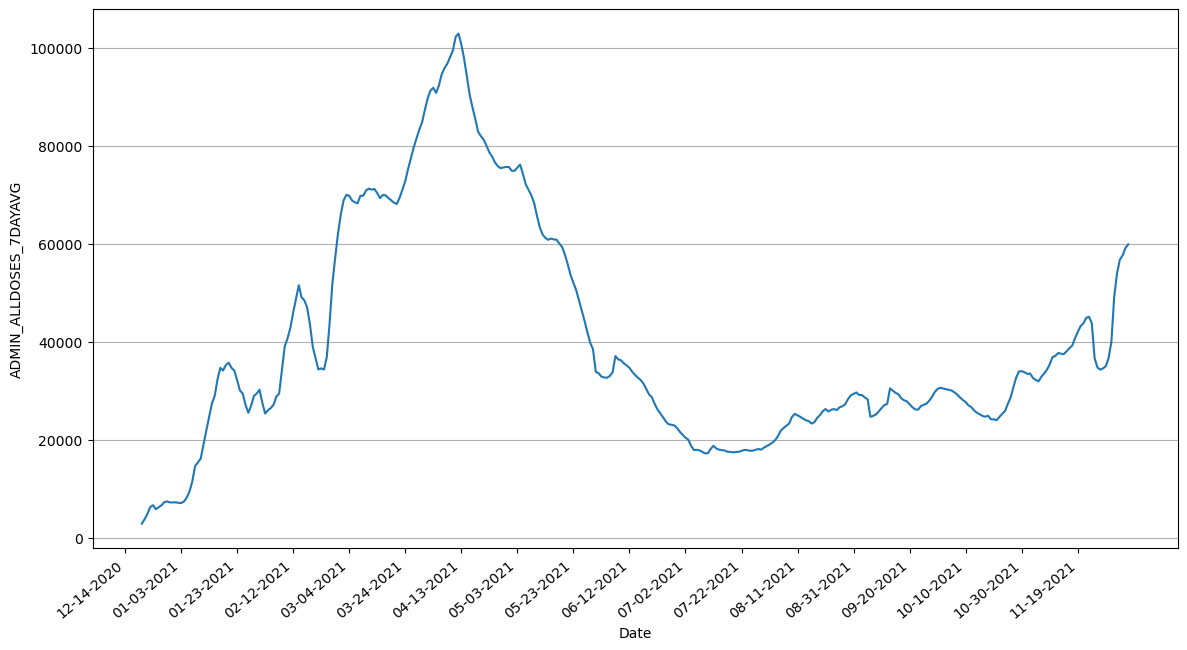

In [21]:
fig3, ax3 = plt.subplots(figsize=(14,7))
ax3=sns.lineplot(x=dailyVaccinations["Date"].dt.strftime('%m-%d-%Y'), 
                  y=dailyVaccinations["ADMIN_ALLDOSES_7DAYAVG"], 
                  palette=["r"]
                  )
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax3.ticklabel_format(axis='y', style='plain')


for index, tickLabel in enumerate(ax3.get_xticklabels()):
    if index%20==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax3.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)
        
plt.grid(axis='y')
        

c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanve\AppData\Local\Temp\ipykernel_12264\3510317560.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

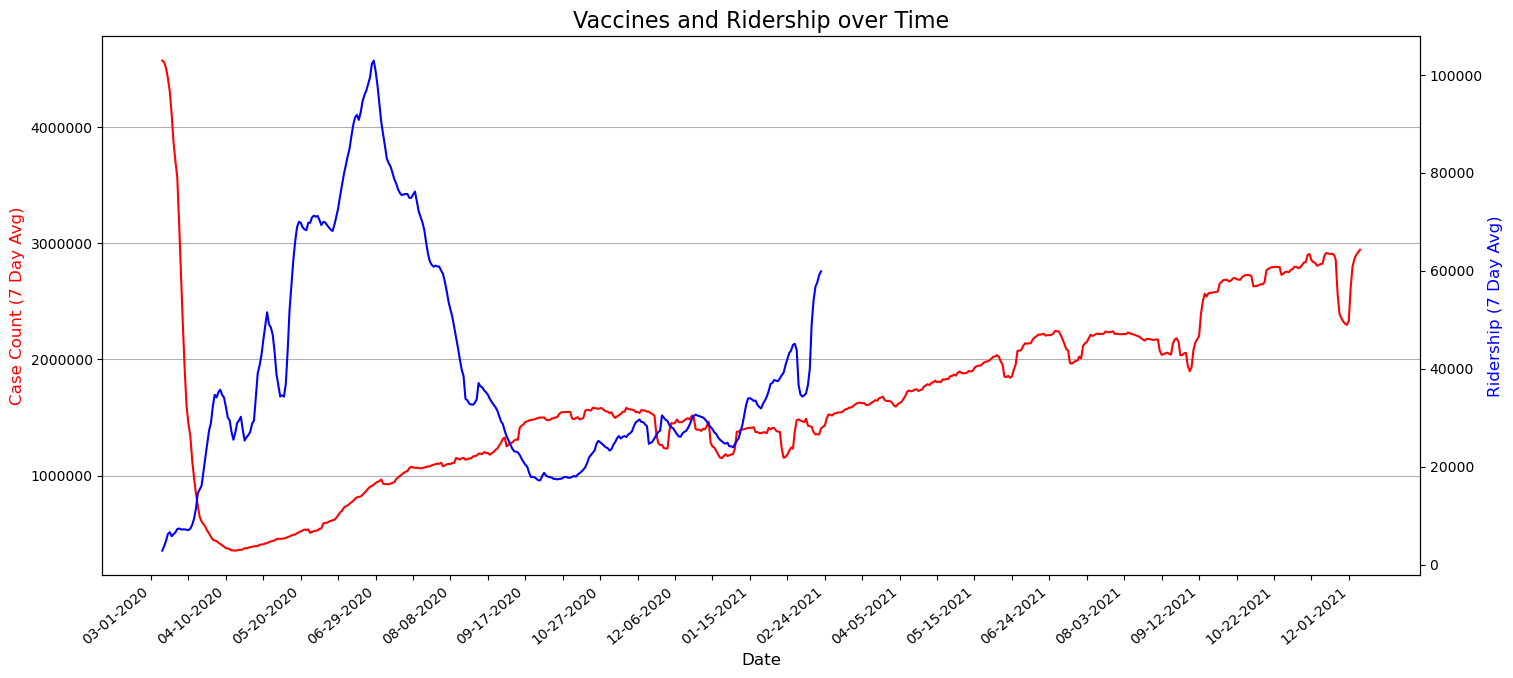

In [43]:
plt.figure(figsize=(17,7))
sns.lineplot(x=riders_avg["Date"].dt.strftime('%m-%d-%Y'), 
                  y=riders_avg["7 day avg"], 
                  color='red',
                  )
ax5 = plt.gca()
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")
ax5.ticklabel_format(axis='y', style='plain')
ax5.set_xlabel('Date', fontsize=12)
ax5.set_ylabel('Case Count (7 Day Avg)', fontsize=12, color="red")
ax5.set_title('Vaccines and Ridership over Time', fontsize=16)

for index, tickLabel in enumerate(ax5.get_xticklabels()):
    if index%40==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax5.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)

ax5.grid(True,axis='y')

ax6 = ax5.twinx()
sns.lineplot(x=riders_avg["Date"].dt.strftime('%m-%d-%Y'), y=dailyVaccinations["ADMIN_ALLDOSES_7DAYAVG"], 
              ax=ax6, 
            #   join=True, 
            #   scale=0.3, 
              color='blue'
              )
ax6.ticklabel_format(axis='y', style='plain')
ax6.set_ylabel('Ridership (7 Day Avg)', fontsize=12, color="blue")

plt.show()

### Fixing Vaccination df
#### Since Vaccinations were not available until December 2020, and the ridership dataset starts in March 2020 the graph is skewed

In [23]:
riders_vaccines = riders_avg.copy()
riders_vaccines.head(10)


,Date,Subways: Total Estimated Ridership,7 day avg
0,2020-03-01,2212965,NaN
1,2020-03-02,5329915,NaN
2,2020-03-03,5481103,NaN
3,2020-03-04,5498809,NaN
4,2020-03-05,5496453,NaN
5,2020-03-06,5189447,NaN
6,2020-03-07,2814637,4.574761e+06
7,2020-03-08,2120656,4.561574e+06
8,2020-03-09,4973513,4.510660e+06
9,2020-03-10,4867818,4.423048e+06


In [24]:
riders_vaccines.drop(columns="Subways: Total Estimated Ridership",inplace=True)

In [25]:
riders_vaccines.head()

,Date,7 day avg
0,2020-03-01,NaN
1,2020-03-02,NaN
2,2020-03-03,NaN
3,2020-03-04,NaN
4,2020-03-05,NaN


In [26]:
rider_filter = riders_vaccines[riders_vaccines["Date"] >= dailyVaccinations["Date"].min()]


In [27]:
rider_filter.head()

,Date,7 day avg
288,2020-12-14,1.482475e+06
289,2020-12-15,1.517117e+06
290,2020-12-16,1.498139e+06
291,2020-12-17,1.400779e+06
292,2020-12-18,1.393547e+06


c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanve\AppData\Local\Temp\ipykernel_12264\1567453120.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")
c:\Users\tanve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

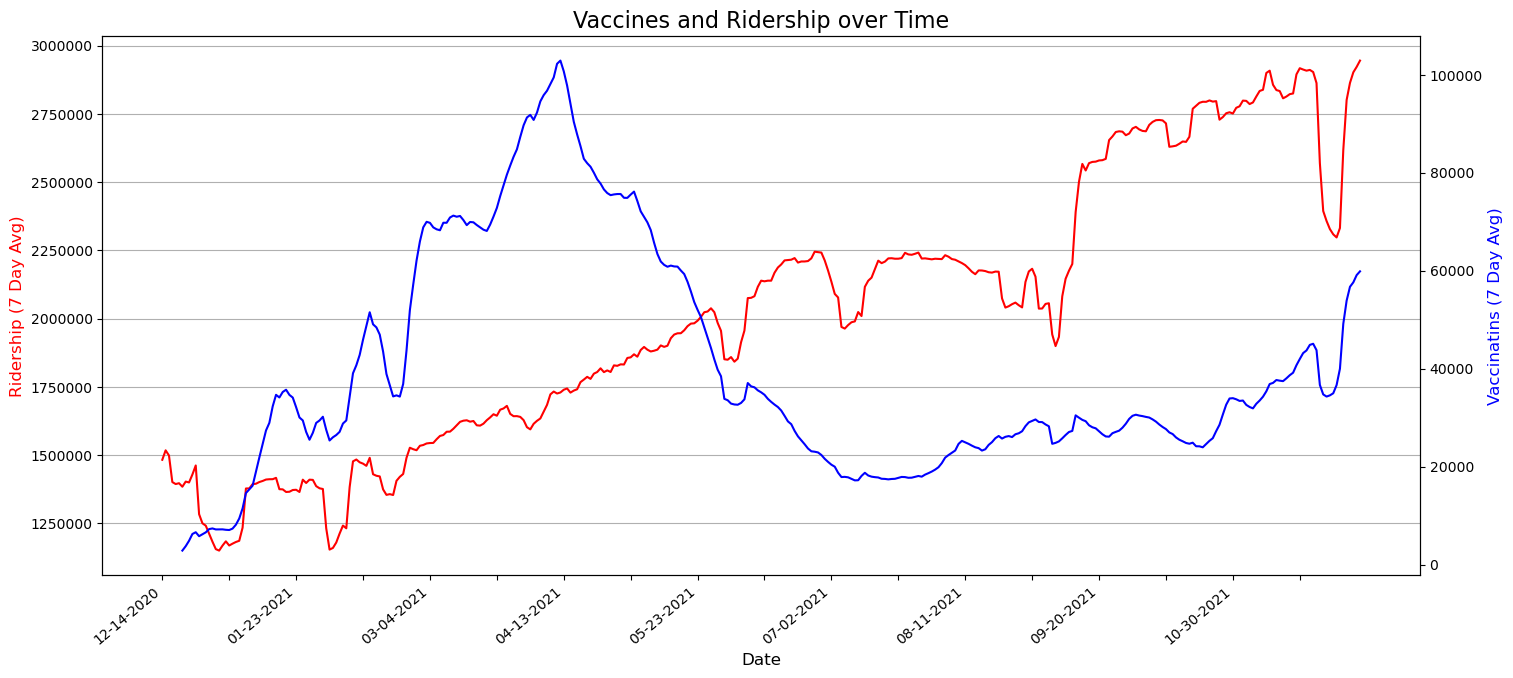

In [28]:
plt.figure(figsize=(17,7))
sns.lineplot(x=rider_filter["Date"].dt.strftime('%m-%d-%Y'), 
                  y=rider_filter["7 day avg"], 
                  color='red',
                  )
ax5 = plt.gca()
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")
ax5.ticklabel_format(axis='y', style='plain')
ax5.set_xlabel('Date', fontsize=12)
ax5.set_ylabel('Ridership (7 Day Avg)', fontsize=12, color="red")
ax5.set_title('Vaccines and Ridership over Time', fontsize=16)

for index, tickLabel in enumerate(ax5.get_xticklabels()):
    if index%40==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax5.get_xticklines()):
    if index%40==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)

ax5.grid(True,axis='y')

ax6 = ax5.twinx()
sns.lineplot(x=dailyVaccinations["Date"].dt.strftime('%m-%d-%Y'), y=dailyVaccinations["ADMIN_ALLDOSES_7DAYAVG"], 
              ax=ax6, 
            #   join=True, 
            #   scale=0.3, 
              color='blue'
              )
ax6.ticklabel_format(axis='y', style='plain')
ax6.set_ylabel('Vaccinatins (7 Day Avg)', fontsize=12, color="blue")

plt.show()

## Correlation Analysis and Heatmap Plotting

In [29]:
corr_df = pd.DataFrame()
corr_df["dailyRiders"] = rider_filter["7 day avg"]
corr_df["cases"] = dailyCovidCases["CASE_COUNT_7DAY_AVG"]
corr_df["vaccines"] = dailyVaccinations["ADMIN_ALLDOSES_7DAYAVG"]

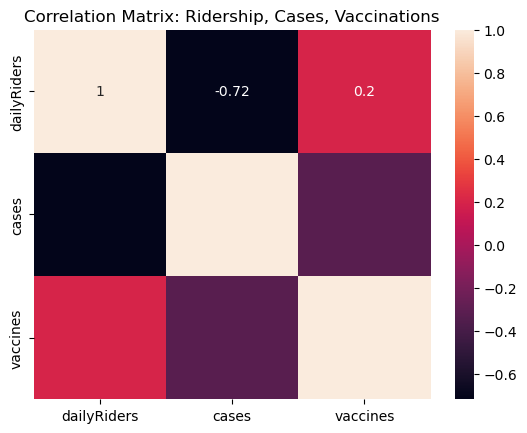

In [30]:
corrPlot = sns.heatmap(corr_df.corr(), annot = True, robust=True)
corrPlot.set_title("Correlation Matrix: Ridership, Cases, Vaccinations")

plt.show()

In [31]:
rider_filter["7 day avg"].corr(dailyCovidCases["CASE_COUNT_7DAY_AVG"]).round(2)

-0.72

In [32]:
rider_filter["7 day avg"].corr(dailyVaccinations["ADMIN_ALLDOSES_7DAYAVG"]).round(2)

0.2

In [33]:
dailyCovidCases["CASE_COUNT_7DAY_AVG"].corr(dailyVaccinations["ADMIN_ALLDOSES_7DAYAVG"]).round(2)

-0.29

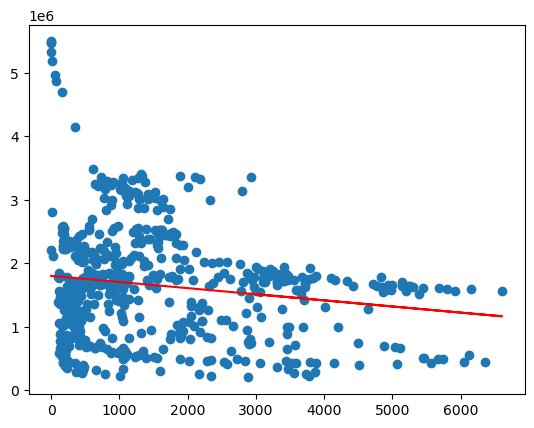

In [34]:
#Run linear regression and plot for each Cases/Ridership and Vaccinations/Ridership
slope,intercept, r_value, p_value, std_err = stats.linregress(
    dailyCovidCases.loc[1:,"CASE_COUNT"],
    dailyRidership["Subways: Total Estimated Ridership"]
    )
plt.scatter(dailyCovidCases.loc[1:,"CASE_COUNT"],dailyRidership["Subways: Total Estimated Ridership"])
plt.plot(dailyCovidCases.loc[1:,"CASE_COUNT"], 
         slope*dailyCovidCases.loc[1:,"CASE_COUNT"] + intercept, color='red', label='Linear Regression')
plt.show()

## Forecasting subway ridership using SARIMA

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [36]:
dailyRidership.set_index('Date', inplace=True)

In [37]:
subway = dailyRidership["Subways: Total Estimated Ridership"]

In [77]:
order = (1,1,1)
seasonal_order = (1,1,1,21)

In [78]:
train_size = int(len(subway)*0.8)
train_data, test_data = subway[:train_size], subway[train_size:]

In [79]:
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order,enforce_stationarity=False, enforce_invertibility=False)
result = model.fit()


c:\Users\tanve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\tanve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [80]:
forecast = result.forecast(steps=len(test_data))

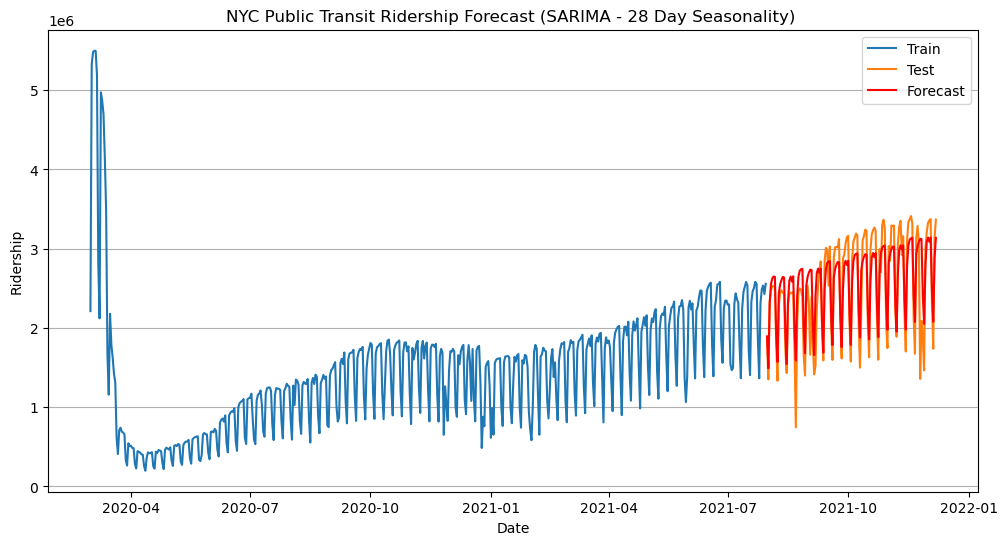

In [81]:
plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('NYC Public Transit Ridership Forecast (SARIMA - 28 Day Seasonality) ')
# plt.title('NYC Public Transit Ridership Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Ridership')
plt.legend()
plt.grid(axis='y')
plt.show()